In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install train-test-plot
# For data loading and manipulation
import pandas as pd
import numpy as np
from sklearn import datasets

# For Visualization/EDA
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

# For data science and machine learning techniques
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To create the interactive components
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')

In [7]:
glass_df = pd.read_csv("/content/drive/MyDrive/rumeysa_ulusal_calisma/data_rna_breast.csv")
glass_df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,...,gpr32_mut,kras_mut,nf2_mut,chek2_mut,ldlrap1_mut,clrn2_mut,acvrl1_mut,agtr2_mut,cdkn2a_mut,ctnna1_mut,magea8_mut,prr16_mut,dtwd2_mut,akt2_mut,braf_mut,foxo1_mut,nt5e_mut,ccnd3_mut,nr3c1_mut,prkg1_mut,tbl1xr1_mut,frmd3_mut,smad2_mut,sgcd_mut,spaca1_mut,rasgef1b_mut,hist1h2bc_mut,nr2f1_mut,klrg1_mut,mbl2_mut,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,1,Pre,3,Right,1.0,2.0,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,1,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Mixed,1,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


In [9]:
glass_df.describe()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,...,hsd17b1,hsd17b10,hsd17b11,hsd17b12,hsd17b13,hsd17b14,hsd17b2,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1904.000000,1904.000000,1904.000000,1904.000000,1832.000000,1904.000000,1904.000000,1859.000000,1904.000000,1904.000000,1904.000000,1904.000000,1884.000000,1403.000000,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,...,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03
mean,3921.982143,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,125.121324,0.420693,0.597164,26.238726,1.750535,-6.302521e-07,-4.201681e-07,3.676471e-07,-8.928571e-07,6.302521e-07,-2.100840e-07,0.000002,-1.175530e-16,-3.676471e-07,-0.000001,-4.726891e-07,5.777311e-07,-0.000001,5.252101e-07,-5.252101e-08,-3.676471e-07,-1.415768e-16,0.000002,-3.676471e-07,-8.928571e-07,-9.978992e-07,5.252101e-08,1.050420e-07,-5.777311e-07,3.676471e-07,2.626050e-07,...,1.050420e-07,-4.201681e-07,-0.000001,-5.252101e-08,-7.878151e-07,8.105095e-18,2.100840e-07,-1.575630e-07,-0.000001,3.676471e-07,5.252101e-08,5.777311e-07,-3.151261e-07,1.050420e-07,0.000001,-5.777311e-07,-9.978992e-07,-1.050420e-07,1.575630e-07,-3.151261e-07,-5.252101e-08,-3.151261e-07,-2.100840e-07,-1.050420e-07,-6.827731e-07,4.201681e-07,-9.978992e-07,5.252101e-08,-3.676471e-07,0.000001,4.726891e-07,-3.676471e-07,-9.453782e-07,-1.050420e-07,-0.000002,3.676471e-07,4.726891e-07,7.878151e-07,-1.256581e-17,-1.953386e-18
std,2358.478332,12.978711,0.405971,1.228615,0.650612,0.486343,4.079993,4.058778,1.144492,76.334148,0.493800,0.490597,15.160976,0.628999,1.000262e+00,1.000262e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000262e+00,1.000263,1.000262e+00,1.000263e+00,1.000262,1.000263e+00,1.000262e+00,1.000262,1.000262e+00,1.000262e+00,1.000264e+00,1.000263e+00,1.000263,1.000262e+00,1.000263e+00,1.000262e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000262e+00,...,1.000263e+00,1.000263e+00,1.000262,1.000262e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000264e+00,1.000263,1.000263e+00,1.000263e+00,1.000262e+00,1.000263e+00,1.000262e+00,1.000262,1.000263e+00,1.000262e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000262e+00,1.000263e+00,1.000263,1.000263e+00,1.000262e+00,1.000262e+00,1.000263e+00,1.000262,1.000264e+00,1.000262e+00,1.000263e+00,1.000262e+00,1.000262e+00
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-2.444400e+00,-2.783500e+00,-4.384600e+00,-5.932800e+00,-2.481200e+00,-3.170500e+00,-3.323700,-2.688700e+00,-3.689800e+00,-2.968600,-3.060200e+00,-2.984900e+00,-6.438700,-2.074000e+00,-4.055600e+00,-3.032000e+00,-2.1

Text(0.5, 1.0, 'Breast Cancer Status')

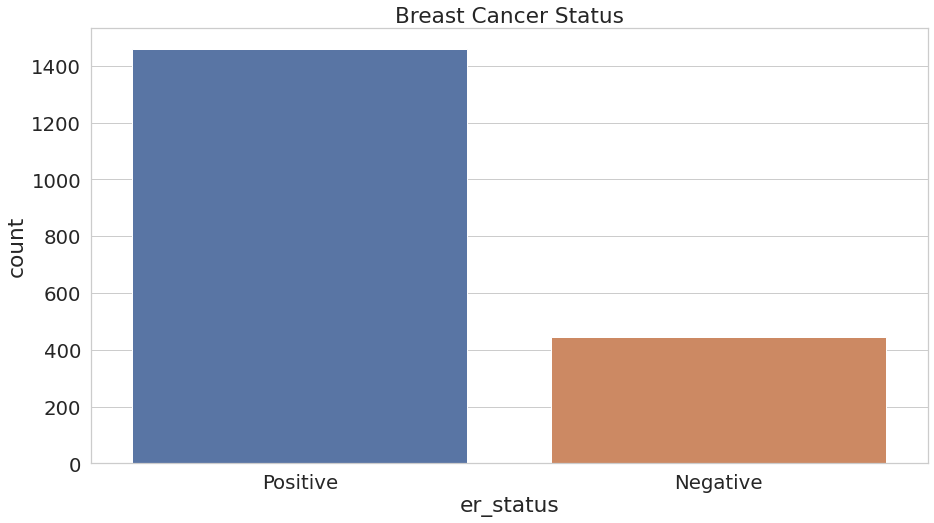

In [12]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot('er_status',data=glass_df).set_title('Breast Cancer Status')

In [13]:
glass_df.groupby('er_status', as_index=False).mean()

,er_status,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,...,hsd17b1,hsd17b10,hsd17b11,hsd17b12,hsd17b13,hsd17b14,hsd17b2,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,Negative,4065.355056,54.568315,0.548315,2.694382,2.855505,0.285393,2.770787,6.023041,4.638133,108.074382,0.438202,0.685393,28.503584,1.860248,-0.104337,0.131204,-0.072579,-0.556823,0.056724,0.076967,-0.061291,0.572962,0.021217,-0.237387,-0.066238,0.226144,-0.458624,0.264744,0.588759,-0.272591,0.287098,-0.275328,0.007357,-0.021550,-0.236438,0.469758,-0.161891,0.571391,0.289622,...,-0.147375,0.217865,0.088760,0.374124,0.008371,-0.153993,0.822281,-0.179285,-0.911596,-0.028335,-0.391755,-0.848300,0.091529,0.079103,-0.288717,-0.026979,0.623875,-0.066268,-0.769169,0.033868,0.307606,0.046594,-0.243242,-0.119683,-0.531739,-0.530649,0.112376,-0.244332,0.375351,0.270948,0.980332,0.196465,0.210462,-0.341126,0.113920,-0.353878,-0.295981,-0.233915,-0.142882,0.080533
1,Positive,3878.252913,63.075291,0.104181,2.628513,2.278653,0.717615,1.767649,5.598596,3.848457,130.320699,0.415353,0.570254,25.552690,1.717854,0.031822,-0.040018,0.022137,0.169832,-0.017300,-0.023476,0.018696,-0.174756,-0.006472,0.072402,0.020202,-0.068974,0.139881,-0.080747,-0.179573,0.083141,-0.087566,0.083979,-0.002244,0.006572,0.072113,-0.143278,0.049377,-0.174277,-0.088335,...,0.044950,-0.066450,-0.027074,-0.114109,-0.002554,0.046968,-0.250798,0.054682,0.278038,0.008643,0.119487,0.258735,-0.027917,-0.024127,0.088061,0.008228,-0.190285,0.020212,0.234599,-0.010330,-0.093821,-0.014212,0.074189,0.036504,0.162181,0.161850,-0.034276,0.074522,-0.114484,-0.082638,-0.299004,-0.059923,-0.064193,0.104044,-0.034748,0.107935,0.090276,0.071346,0.043580,-0.024563


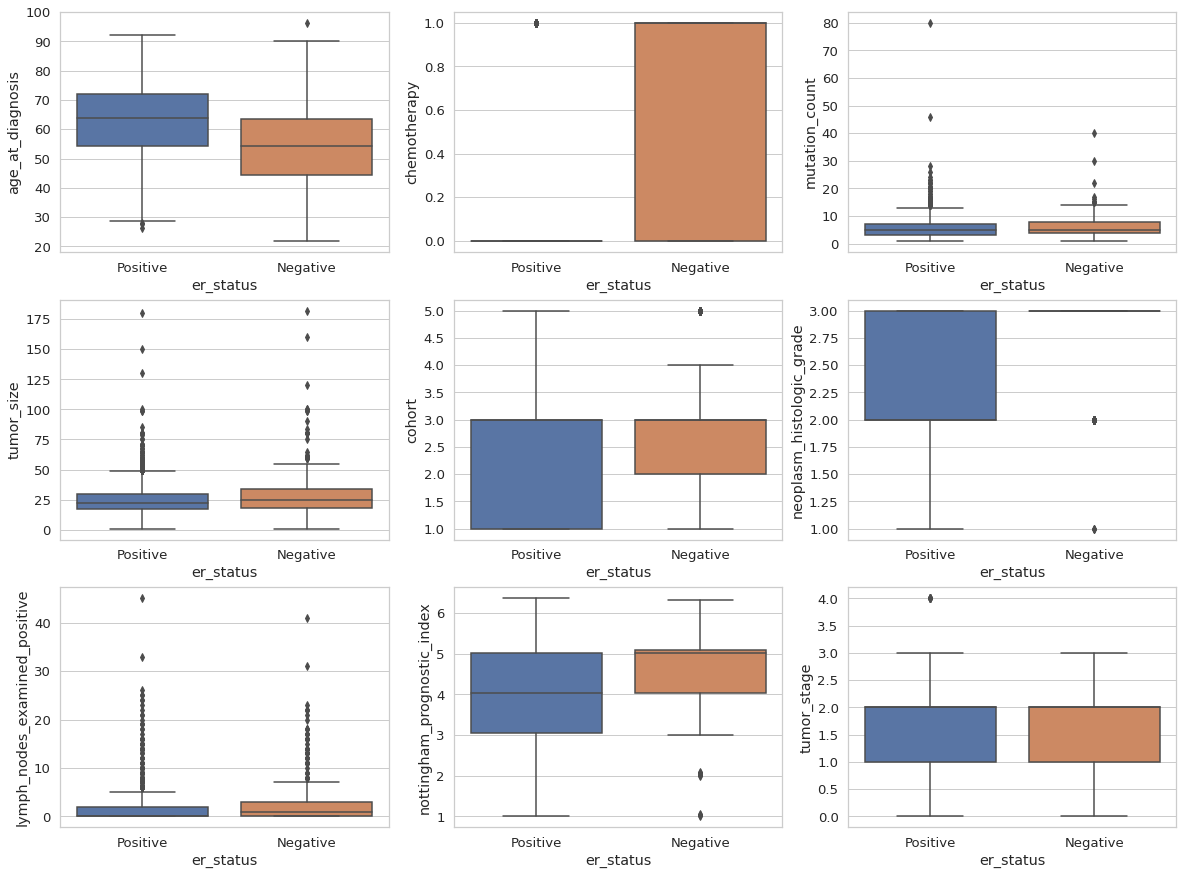

In [19]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='er_status', y='age_at_diagnosis', data=glass_df)
plt.subplot(3,3,2)
sns.boxplot(x='er_status', y='chemotherapy', data=glass_df)
plt.subplot(3,3,3)
sns.boxplot(x='er_status', y='mutation_count', data=glass_df)
plt.subplot(3,3,4)
sns.boxplot(x='er_status', y='tumor_size', data=glass_df)
plt.subplot(3,3,5)
sns.boxplot(x='er_status', y='cohort', data=glass_df)
plt.subplot(3,3,6)
sns.boxplot(x='er_status', y='neoplasm_histologic_grade', data=glass_df)
plt.subplot(3,3,7)
sns.boxplot(x='er_status', y='lymph_nodes_examined_positive', data=glass_df)
plt.subplot(3,3,8)
sns.boxplot(x='er_status', y='nottingham_prognostic_index', data=glass_df)
plt.subplot(3,3,9)
sns.boxplot(x='er_status', y='tumor_stage', data=glass_df)

plt.show()

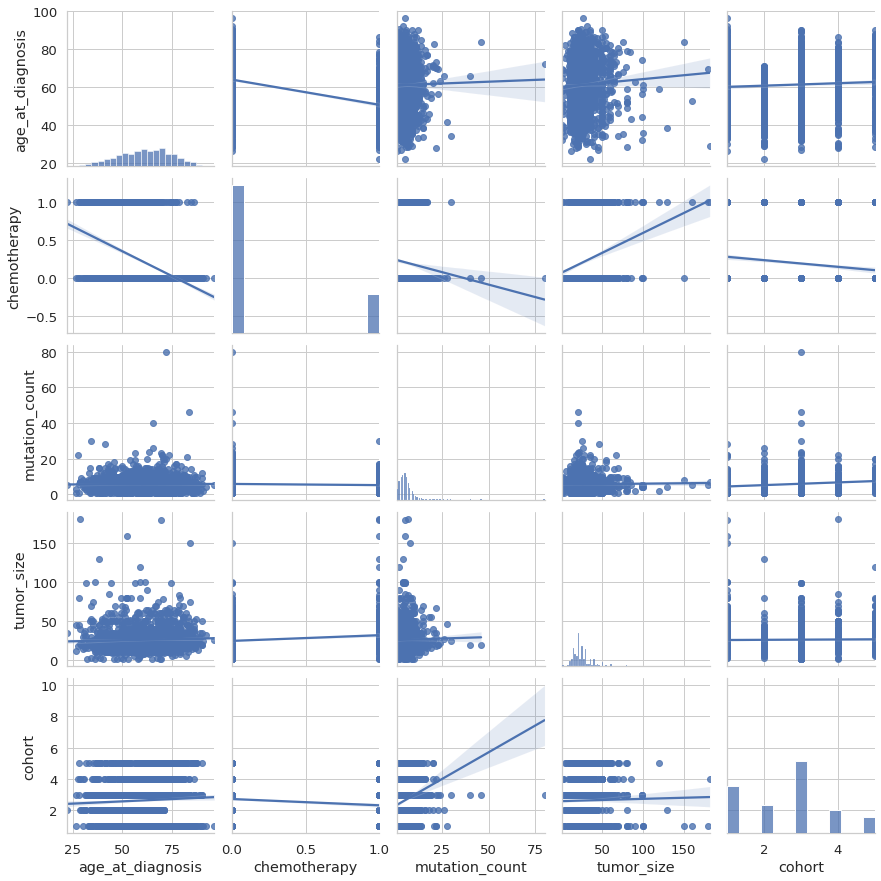

In [34]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(glass_df[['age_at_diagnosis','chemotherapy', 'mutation_count','tumor_size', 'cohort']], kind='reg')

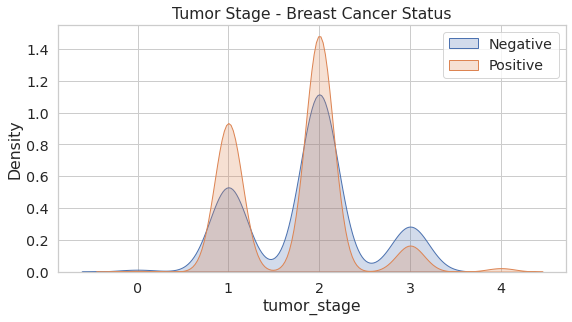

In [50]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(glass_df["tumor_stage"][glass_df.er_status== "Negative"], shade = True)
sns.kdeplot(glass_df["tumor_stage"][glass_df.er_status == "Positive"], shade = True)

plt.title("Tumor Stage - Breast Cancer Status")
plt.legend(['Negative', 'Positive'])

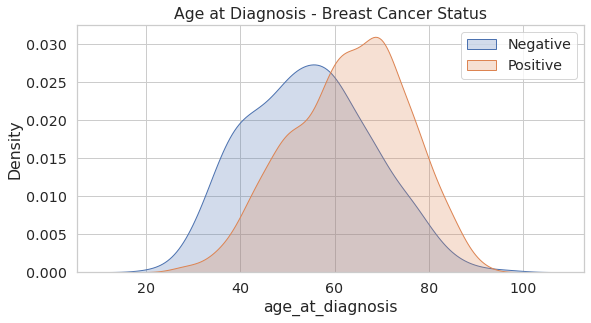

In [51]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(glass_df["age_at_diagnosis"][glass_df.er_status== "Negative"], shade = True)
sns.kdeplot(glass_df["age_at_diagnosis"][glass_df.er_status == "Positive"], shade = True)

plt.title("Age at Diagnosis - Breast Cancer Status")
plt.legend(['Negative', 'Positive'])

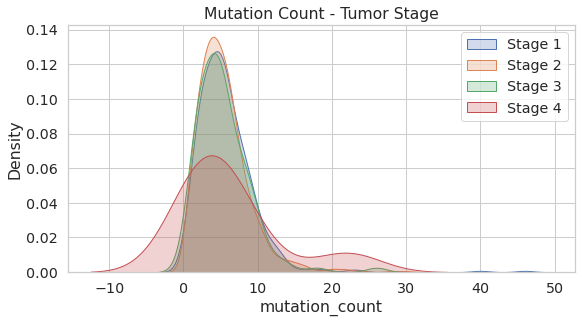

In [52]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(glass_df["mutation_count"][glass_df.tumor_stage== 1], shade = True)
sns.kdeplot(glass_df["mutation_count"][glass_df.tumor_stage == 2], shade = True)
sns.kdeplot(glass_df["mutation_count"][glass_df.tumor_stage== 3], shade = True)
sns.kdeplot(glass_df["mutation_count"][glass_df.tumor_stage == 4], shade = True)

plt.title("Mutation Count - Tumor Stage")
plt.legend(['Stage 1', 'Stage 2','Stage 3','Stage 4'])

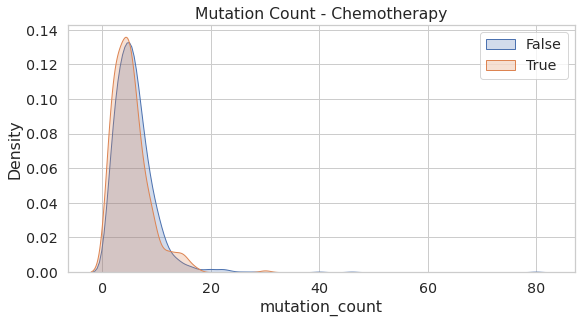

In [53]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(glass_df["mutation_count"][glass_df.chemotherapy== 0], shade = True)
sns.kdeplot(glass_df["mutation_count"][glass_df.chemotherapy == 1], shade = True)


plt.title("Mutation Count - Chemotherapy")
plt.legend(['False', 'True'])

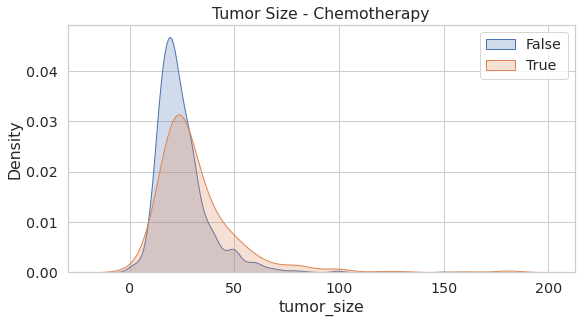

In [54]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(glass_df["tumor_size"][glass_df.chemotherapy== 0], shade = True)
sns.kdeplot(glass_df["tumor_size"][glass_df.chemotherapy == 1], shade = True)


plt.title("Tumor Size - Chemotherapy")
plt.legend(['False', 'True'])

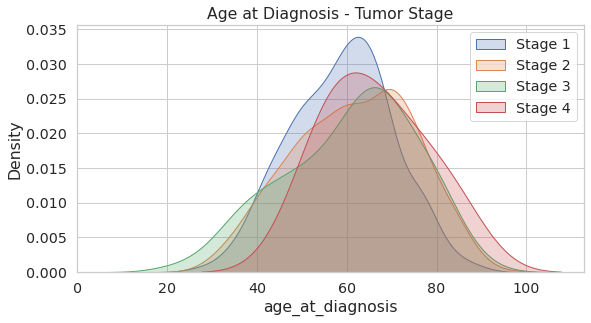

In [55]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(glass_df["age_at_diagnosis"][glass_df.tumor_stage== 1], shade = True)
sns.kdeplot(glass_df["age_at_diagnosis"][glass_df.tumor_stage == 2], shade = True)
sns.kdeplot(glass_df["age_at_diagnosis"][glass_df.tumor_stage== 3], shade = True)
sns.kdeplot(glass_df["age_at_diagnosis"][glass_df.tumor_stage == 4], shade = True)

plt.title("Age at Diagnosis - Tumor Stage")
plt.legend(['Stage 1', 'Stage 2','Stage 3','Stage 4'])

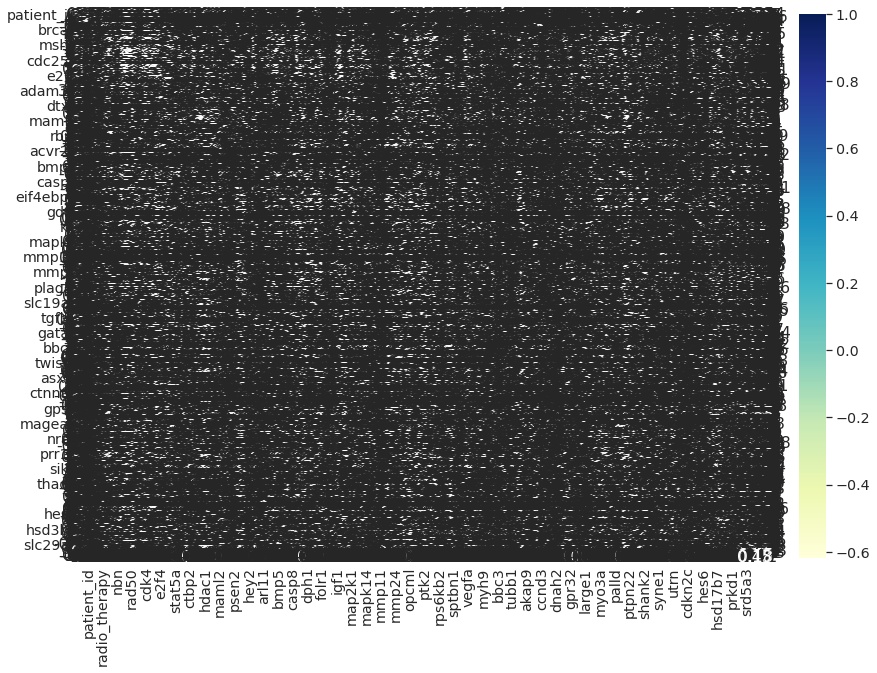

In [56]:
plt.subplots(figsize=(15,10))
sns.heatmap(glass_df.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer

In [126]:
df = pd.read_csv('/content/drive/MyDrive/rumeysa_ulusal_calisma/data_rna_breast.csv', encoding='latin-1')
df.sample(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,...,gpr32_mut,kras_mut,nf2_mut,chek2_mut,ldlrap1_mut,clrn2_mut,acvrl1_mut,agtr2_mut,cdkn2a_mut,ctnna1_mut,magea8_mut,prr16_mut,dtwd2_mut,akt2_mut,braf_mut,foxo1_mut,nt5e_mut,ccnd3_mut,nr3c1_mut,prkg1_mut,tbl1xr1_mut,frmd3_mut,smad2_mut,sgcd_mut,spaca1_mut,rasgef1b_mut,hist1h2bc_mut,nr2f1_mut,klrg1_mut,mbl2_mut,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
1221,5213,74.98,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,Her2,3.0,Negative,Negative,3.0,GAIN,Negative,Ductal/NST,1,Post,5,Left,12.0,9.0,6.0500,IDC,43.400000,0,Negative,1,HER2+,25.0,3.0,Died of Disease,-0.0380,0.8079,0.4611,0.1555,0.9762,-0.5793,0.5628,0.5717,-0.3564,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1826,7189,58.75,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,4.0,Positve,Positive,2.0,LOSS,Negative,Ductal/NST,1,Post,1,Right,1.0,1.0,4.0420,IDC,143.600000,0,Negative,1,NaN,21.0,NaN,Died of Disease,-1.0881,1.0096,1.0185,0.1199,1.8483,0.3580,0.4438,-0.4160,0.1590,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1315,5366,75.56,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,3.0,Positve,Positive,3.0,GAIN,Negative,Lobular,1,Post,5,Left,1.0,2.0,5.0800,ILC,243.166667,1,Negative,0,HER2+,40.0,2.0,Living,1.7067,0.5310,-0.9516,0.9369,-0.9026,0.1551,0.9169,0.4478,1.3578,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
698,3386,40.06,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,Her2,2.0,Negative,Negative,3.0,GAIN,Positive,Ductal/NST,0,Pre,1,Left,3.0,6.0,5.0700,IDC,55.633333,0,Negative,1,HER2+,35.0,2.0,Died of Disease,0.5919,0.3128,1.2057,-0.7172,0.6357,-1.4700,1.1558,0.8394,-0.4268,...,0,0,0,0,V271I,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1802,7154,77.54,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,Basal,4.0,Negative,Negative,3.0,NEUTRAL,Negative,Ductal/NST,1,Post,10,Right,0.0,14.0,4.0652,IDC,108.466667,0,Negative,0,ER-/HER2-,32.6,NaN,Died of Other Causes,-1.0821,0.1610,-1.0025,-3.4963,0.5262,0.2347,0.0816,0.8055,-0.6257,...,0,0,0,0,0,0,0,0,0,0,0,N100I,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [127]:
df.shape

(1904, 693)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


Positive    1459
Negative     445
Name: er_status, dtype: int64

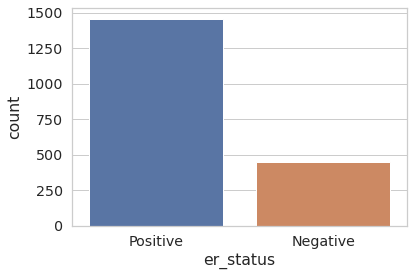

In [131]:
import seaborn as sns
sns.countplot(df['er_status'])
df['er_status'].value_counts()

2.0    800
1.0    475
3.0    115
4.0      9
0.0      4
Name: tumor_stage, dtype: int64

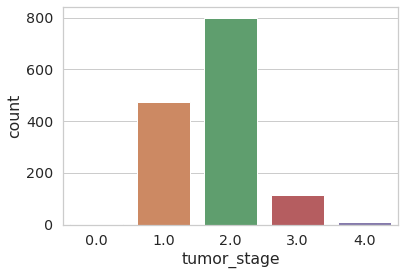

In [132]:
import seaborn as sns
sns.countplot(df['tumor_stage'])
df['tumor_stage'].value_counts()

In [182]:
# Performing PCA
X_var = glass_df[['brca1','brca2','palb2','pten','tp53','atm','cdh1','chek2','nbn','nf1','stk11','bard1','mlh1','msh2','msh6','pms2','epcam','rad51c','rad51d','rad50','rb1','rbl1','rbl2','ccna1','ccnb1','cdk1','ccne1','cdk2','cdc25a','ccnd1','cdk4','cdk6','ccnd2','cdkn2a','cdkn2b','myc','cdkn1a','cdkn1b','e2f1','e2f2','e2f3','e2f4','e2f5','e2f6','e2f7','e2f8','src','jak1','jak2','stat1','stat2','stat3','stat5a','stat5b','mdm2','tp53bp1','adam10','adam17','aph1a','aph1b','arrdc1','cir1','ctbp1','ctbp2','cul1','dll1','dll3','dll4','dtx1','dtx2','dtx3','dtx4','ep300','fbxw7','hdac1','hdac2','hes1','hes5','heyl','itch','jag1','jag2','kdm5a','lfng','maml1','maml2','maml3','ncor2','ncstn','notch1','notch2','notch3','nrarp','numb','numbl','psen1','psen2','psenen','rbpj','rbpjl','rfng','snw1','spen','hes2','hes4','hes7','hey1','hey2','acvr1','acvr1b','acvr1c','acvr2a','acvr2b','acvrl1','akt1','akt1s1','akt2','apaf1','arl11','atr','aurka','bad','bcl2','bcl2l1','bmp10','bmp15','bmp2','bmp3','bmp4','bmp5','bmp6','bmp7','bmpr1a','bmpr1b','bmpr2','braf','casp10','casp3','casp6','casp7','casp8','casp9','chek1','csf1','csf1r','cxcl8','cxcr1','cxcr2','dab2','diras3','dlec1','dph1','egfr','eif4e','eif4ebp1','eif5a2','erbb2','erbb3','erbb4','fas','fgf1','fgfr1','folr1','folr2','folr3','foxo1','foxo3','gdf11','gdf2','gsk3b','hif1a','hla-g','hras','igf1','igf1r','inha','inhba','inhbc','itgav','itgb3','izumo1r','kdr','kit','kras','map2k1','map2k2','map2k3','map2k4','map2k5','map3k1','map3k3','map3k4','map3k5','mapk1','mapk12','mapk14','mapk3','mapk4','mapk6','mapk7','mapk8','mapk9','mdc1','mlst8','mmp1','mmp10','mmp11','mmp12','mmp13','mmp14','mmp15','mmp16','mmp17','mmp19','mmp2','mmp21','mmp23b','mmp24','mmp25','mmp26','mmp27','mmp28','mmp3','mmp7','mmp9','mtor','nfkb1','nfkb2','opcml','pdgfa','pdgfb','pdgfra','pdgfrb','pdpk1','peg3','pik3ca','pik3r1','pik3r2','plagl1','ptk2','rab25','rad51','raf1','rassf1','rheb','rictor','rps6','rps6ka1','rps6ka2','rps6kb1','rps6kb2','rptor','slc19a1','smad1','smad2','smad3','smad4','smad5','smad6','smad7','smad9','sptbn1','terc','tert','tgfb1','tgfb2','tgfb3','tgfbr1','tgfbr2','tgfbr3','tsc1','tsc2','vegfa','vegfb','wfdc2','wwox','zfyve9','arid1a','arid1b','cbfb','gata3','kmt2c','kmt2d','myh9','ncor1','pde4dip','ptprd','ros1','runx1','tbx3','abcb1','abcb11','abcc1','abcc10','bbc3','bmf','cyp2c8','cyp3a4','fgf2','fn1','map2','map4','mapt','nr1i2','slco1b3','tubb1','tubb4a','tubb4b','twist1','adgra2','afdn','aff2','agmo','agtr2','ahnak','ahnak2','akap9','alk','apc','arid2','arid5b','asxl1','asxl2','bap1','bcas3','birc6','cacna2d3','ccnd3','chd1','clk3','clrn2','col12a1','col22a1','col6a3','ctcf','ctnna1','ctnna3','dnah11','dnah2','dnah5','dtwd2','fam20c','fanca','fancd2','flt3','foxp1','frmd3','gh1','gldc','gpr32','gps2','hdac9','herc2','hist1h2bc','kdm3a','kdm6a','klrg1','l1cam','lama2','lamb3','large1','ldlrap1','lifr','lipi','magea8','map3k10','map3k13','men1','mtap','muc16','myo1a','myo3a','ncoa3','nek1','nf2','npnt','nr2f1','nr3c1','nras','nrg3','nt5e','or6a2','palld','pbrm1','ppp2cb','ppp2r2a','prkacg','prkce','prkcq','prkcz','prkg1','prps2','prr16','ptpn22','ptprm','rasgef1b','rpgr','ryr2','sbno1','setd1a','setd2','setdb1','sf3b1','sgcd','shank2','siah1','sik1','sik2','smarcb1','smarcc1','smarcc2','smarcd1','spaca1','stab2','stmn2','syne1','taf1','taf4b','tbl1xr1','tg','thada','thsd7a','ttyh1','ubr5','ush2a','usp9x','utrn','zfp36l1','ackr3','akr1c1','akr1c2','akr1c3','akr1c4','akt3','ar','bche','cdk8','cdkn2c','cyb5a','cyp11a1','cyp11b2','cyp17a1','cyp19a1','cyp21a2','cyp3a43','cyp3a5','cyp3a7','ddc','hes6','hsd17b1','hsd17b10','hsd17b11','hsd17b12','hsd17b13','hsd17b14','hsd17b2','hsd17b3','hsd17b4','hsd17b6','hsd17b7','hsd17b8','hsd3b1','hsd3b2','hsd3b7','mecom','met','ncoa2','nrip1','pik3r3','prkci','prkd1','ran','rdh5','sdc4','serpini1','shbg','slc29a1','sox9','spry2','srd5a1','srd5a2','srd5a3','st7','star','tnk2','tulp4','ugt2b15','ugt2b17','ugt2b7']]

In [183]:
X = X_var
y = glass_df["er_status"].values

In [184]:
# Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Check whether the train and test have instances of all the glass types
print(np.unique(y_train))
print(np.unique(y_test))

['Negative' 'Positive']
['Negative' 'Positive']


In [207]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)
sc1_1=metrics.precision_score(y_pred,y_test,average='weighted')
sc1_2=metrics.f1_score(y_pred,y_test,average='weighted')
sc1_3=metrics.recall_score(y_pred,y_test,average='weighted')
mat_1 = confusion_matrix(y_test, y_pred)
# XGBoost CLassifier
xgbMod = XGBClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
xgbMod.fit(X_train,y_train)
y_pred = xgbMod.predict(X_test)
sc2 = metrics.accuracy_score(y_pred,y_test)
sc2_1=metrics.precision_score(y_pred,y_test,average='weighted')
sc2_2=metrics.f1_score(y_pred,y_test,average='weighted')
sc2_3=metrics.recall_score(y_pred,y_test,average='weighted')
mat_2 = confusion_matrix(y_test, y_pred)
# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)
sc3_1=metrics.precision_score(y_pred,y_test,average='weighted')
sc3_2=metrics.f1_score(y_pred,y_test,average='weighted')
sc3_3=metrics.recall_score(y_pred,y_test,average='weighted')
mat_3 = confusion_matrix(y_test, y_pred)
# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)
sc4_1=metrics.precision_score(y_pred,y_test,average='weighted')
sc4_2=metrics.f1_score(y_pred,y_test,average='weighted')
sc4_3=metrics.recall_score(y_pred,y_test,average='weighted')
mat_4 = confusion_matrix(y_test, y_pred)
# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc5 = metrics.accuracy_score(y_pred,y_test)
sc5_1=metrics.precision_score(y_pred,y_test,average='weighted')
sc5_2=metrics.f1_score(y_pred,y_test,average='weighted')
sc5_3=metrics.recall_score(y_pred,y_test,average='weighted')
mat_5 = confusion_matrix(y_test, y_pred)

In [208]:
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)
print(xgbMod.feature_importances_)
print(gbmMod.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00391614 0.         0.00213607
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.05547608 0.         0.         0.00555564
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00341772 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.0041477
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00421476 0.         0.         0.
 0.         0.00965003 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        

In [209]:
# Breast kanser olup olmadığını sorgulayan (0: kanser değil, 1: kanserdir) ve makine öğrenme yöntemleri ile analiz..
pd.DataFrame([['Support Vector Machine',sc1_1,sc1_2,sc1_3,sc1],['XG Boost',sc2_1,sc2_2,sc2_3,sc2],['Gradient Boost',sc3_1,sc3_2,sc3_3,sc3],
                             ['Decision Tree',sc4_1,sc4_2,sc4_3,sc4],['Random Forest',sc5_1,sc5_2,sc5_3,sc5]],
                                 columns=['Model','Precision','F1 score','Recall','Accuracy'])

,Model,Precision,F1 score,Recall,Accuracy
0,Support Vector Machine,0.975425,0.975412,0.975524,0.975524
1,XG Boost,0.963208,0.963244,0.963287,0.963287
2,Gradient Boost,0.963208,0.963244,0.963287,0.963287
3,Decision Tree,0.926953,0.926749,0.926573,0.926573
4,Random Forest,0.953302,0.948943,0.947552,0.947552


Text(0.5, 1.0, 'Random Forest (Rastgele Orman) Karmaşıklık Matrisi')

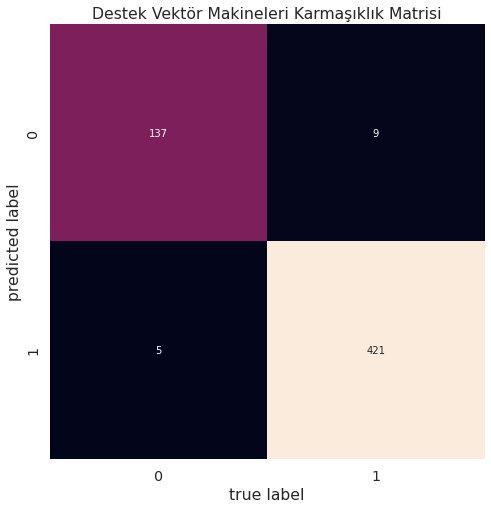

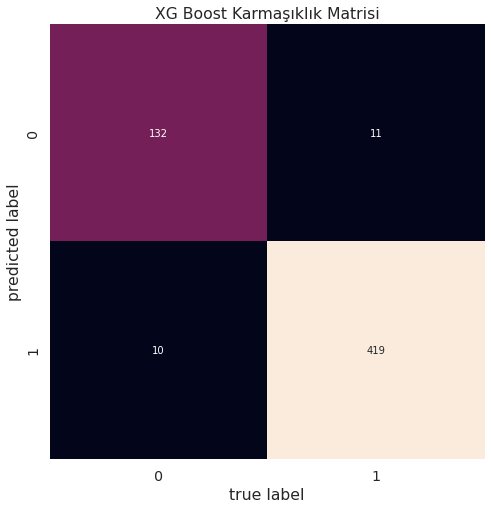

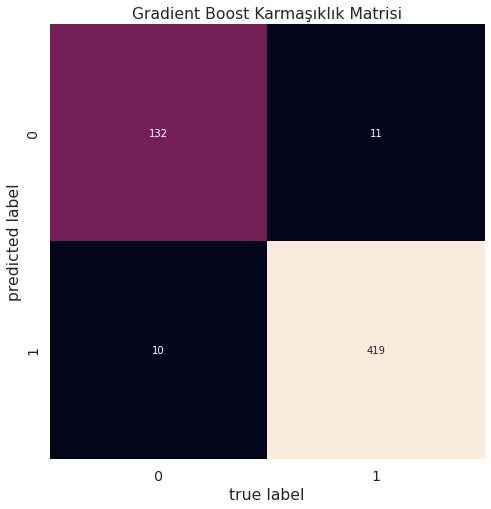

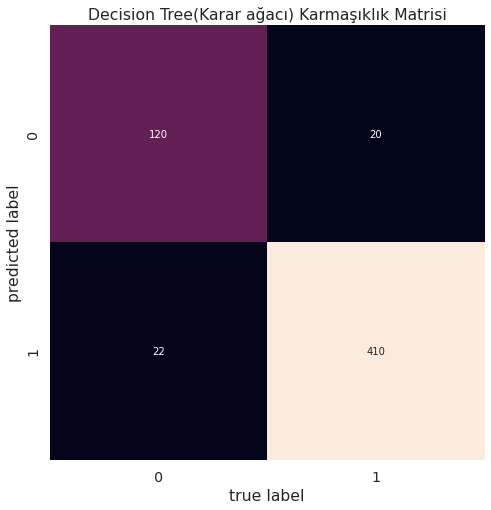

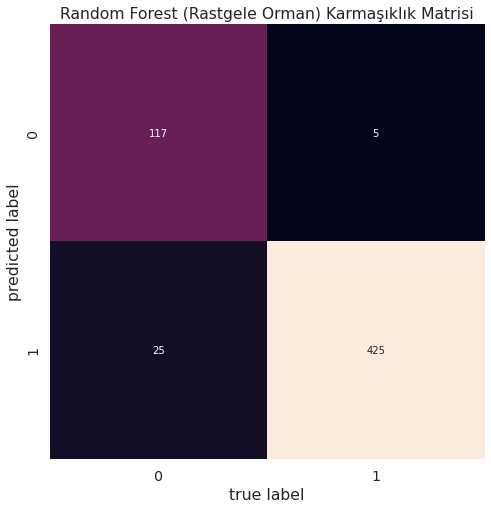

In [217]:
plt.subplots(figsize=(12,8))
sns.heatmap(mat_1.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Destek Vektör Makineleri Karmaşıklık Matrisi')

plt.subplots(figsize=(12,8))
sns.heatmap(mat_2.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('XG Boost Karmaşıklık Matrisi')

plt.subplots(figsize=(12,8))
sns.heatmap(mat_3.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Gradient Boost Karmaşıklık Matrisi')

plt.subplots(figsize=(12,8))
sns.heatmap(mat_4.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Decision Tree(Karar ağacı) Karmaşıklık Matrisi')

plt.subplots(figsize=(12,8))
sns.heatmap(mat_5.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Random Forest (Rastgele Orman) Karmaşıklık Matrisi')